<a id='top'></a>

# Homework 2: CSCI 4022 F19
***

**Name**: David Martin

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 27**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.
**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Problem 6](#p6) 

---

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)
# HW2 Part 1
# Problem 1 (Theory: minhashing; 10 pts)

Consider minhash values for a single column vector that contains seven components/rows. Five rows hold 0 and two hold 1. Consider taking all 7! = 5040 possible distinct permutations of seven rows. When we choose a permutation of the rows and produce a minhash value for the column, we will use the number of the row, in the permuted order, that is the first with a 1.  Use Markdown cells to demonstrate answers to the following.

#### a) For exactly how many of the 5040 permutations is the minhash value for the column a 7?  What proportion is this?

In [167]:
import itertools

p = 2/7
C = np.random.choice([1, 0], size=(7, 1), p=[p, 1-p])
dfC = pd.DataFrame(C, columns=['Column 1'])
dfC

,Column 1
0,1
1,0
2,0
3,0
4,1
5,1
6,0


none because at least the 6th row would contain the first 1.

#### b) For exactly how many of the 5040 permutations is the minhash value for the column a 6?

In [168]:
import math
math.factorial(2)*math.factorial(5)/5040

0.047619047619047616

There is only one permuation possible for the minhash value for the column to be a 6, thus, 0.000198 of the permuations or 1/5040th

#### c) For exactly how many of the 5040 permutations is the minhash value for the column a 3?

In [170]:
print(4*2*math.factorial(5), 'of the permutations the minhash value is 3')

960 of the permutations the minhash value is 3


***
<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (Edit Distance; 20 pts)

The following code is a recursive implementation of edit distance.

In [171]:
#see https://www.python-course.eu/levenshtein_distance.php for this and other, more computationally efficient implementations

def LD(s, t):
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
       
    res = min([LD(s[:-1], t)+1,
               LD(s, t[:-1])+1, 
               LD(s[:-1], t[:-1]) + cost])
    return res


#### 2a) Determine whether the above implementation only allows insertions and deletions or also also substitutions as single operation by calculating the pairwise edit distances by hand between "house," "whose," and "louse" and comparing to the output from the `LD` function.

## Answer:
***
#### Using only insertions and deletions:
    house to whose = 1.insert w before h  2. delete u = 2
    house to louse = 1. delete h   2. insert l  = 2
    
#### Using substitutions:
    house to whose = 1.insert w before h  2. delete u = 2
    house to louse = 1. substitute l with h  = 1



In [172]:
print(
# LD('abcde','acfdeg'),
LD('house', 'whose'),
LD('whose', 'louse'),
LD('house', 'louse')
)

2 3 1


by comparing the returned value from LD and the hand calculated edit distance of house to louse, it seems apparent that it also allows substitutions as single operations.
***

This quesion makes use of two files called: `Actual words.txt` and `pred_words.txt`.

Tom is developing a speech recognition system, but found that the system is misspelling a few words,  He wants to check if the computer is having difficulty in indentifying long words.  Help him out by plotting a graph with the length of the word in the x-axis and the `LD` function distance necessary to convert the system identified string to the original string on the y-axis.

#### 2b)  Compare edit distances and plot distances versus word length in a plot:

In [173]:
def memoize(func):
    mem = {}
    def memoizer(*args, **kwargs):
        key = str(args) + str(kwargs)
        if key not in mem:
            mem[key] = func(*args, **kwargs)
        return mem[key]
    return memoizer
@memoize    
def levenshtein(s, t):
    if s == "":
        return len(t)
    if t == "":
        return len(s)
    if s[-1] == t[-1]:
        cost = 0
    else:
        cost = 1
    
    res = min([levenshtein(s[:-1], t)+1,
               levenshtein(s, t[:-1])+1, 
               levenshtein(s[:-1], t[:-1]) + cost])
    return res


[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0] [1, 5, 3, 1, 3, 3, 8, 13, 7, 9, 11, 13, 6, 8, 11, 7, 8, 4, 5, 4, 2, 4, 3, 2, 3, 3, 8, 4, 3, 4, 3, 4, 8, 6, 8, 7, 6, 4, 13, 11, 9, 8, 7, 6, 10, 12, 5, 6, 5]


<function matplotlib.pyplot.show(*args, **kw)>

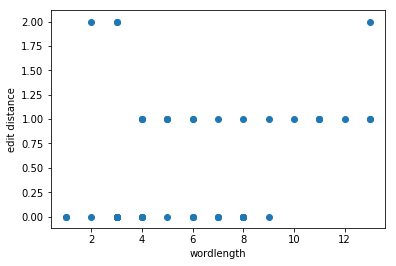

In [174]:
text_file = open("./data/actual_words.txt", "r")
dfA = text_file.read().split('\n')
text_file = open("./data/pred_words.txt", "r")
dfP = text_file.read().split('\n')
wordlength = []
distance = []

for i in range(49):
    distance.append(levenshtein(dfA[i], dfP[i]))
    wordlength.append(len(dfA[i]))

print(distance, wordlength)

plt.scatter(wordlength, distance)
plt.xlabel('wordlength')
plt.ylabel('edit distance')
plt.show

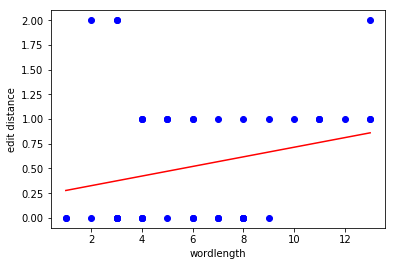

In [175]:
from scipy.stats import linregress
x=wordlength
y=distance
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.xlabel('wordlength')
plt.ylabel('edit distance')
plt.show()

In [176]:
np.polyfit(x,y,1)

array([0.0486139 , 0.22900763])

Consider the the number of mispellings vs. word length instead of edit distance.

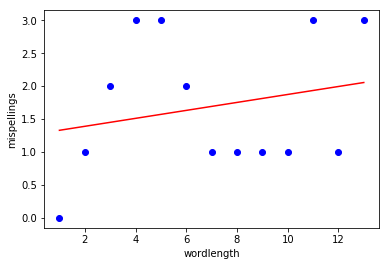

In [177]:
wordLs = list(set(wordlength))

mispells = [0]*len(wordLs)
for i in range(len(x)):
    if distance[i] > 0:
        index = wordLs.index(wordlength[i])
        mispells[index] += 1
        
x=wordLs
y=mispells
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.xlabel('wordlength')
plt.ylabel('mispellings')
plt.show()


#### 2c)  Compare whether or not there is a misspelling versus word length in a plot:

# Answer
***
Based on the simple results of the linear regression and the scatter plot created, there is am obvious positive trend in terms of the edit distance increasing in direct relation to the wordlength. Although I would caution that the trend is only slight and I have seen peers with results that seem to indicate that there is no direct linear relationship between the number of mispellings and word length.
<br>
Based on my results however, I am inclined to suggest there is likely a relationship between edit distance and wordlength.

#### 2d)  Can you infer from the graph if there is a linear relationship between the number of operations and the length of words?  What about a logistic-linear relationship between whether there is a misspelling or not and the length of words?  Report the confidence intervals of appropriate regression coefficients to support your conclusion.


# Answer
***


***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (Applied Minhashing; 20 pts)

In this problem we compare similarities of 5 documents available on http://www.gutenberg.org

 1) The first approximately 10000 characters of Miguel de Unamuno's *Niebla*, written in Spanish, in the file `Niebla.txt`
 
 2) The first approximately 10000 characters of Miguel de Cervantes *The Ingenious Gentleman Don Quixote of La Mancha*, written in Spanish, in the file `DQ.txt`
 
 3) The first approximately 10000 characters of Homer's *The Iliad*, translated into English by Alexander Pope, in the file `Iliad.txt`
 
 4) The first approximately 10000 characters of Mark Twain's *The Adventures of Tom Sawyer*, in the file `TS.txt` 
 
 5) A selected approximately 10000 characters of Mark Twain's *Adventures of Huckleberry Finn*, in the file `MT.txt`

### a) Clean the 4 documents, scrubbing all punctuation, changes cases to lower case, and removing accent marks as appropriate.  

You should have only 27 unique characters in each book/section after cleaning, corresponding to white spaces and the 26 letters.  

(You can and probably should use functions in the string package such as `string.lower`, `string.replace`, etc.)




In [12]:
import string
import unicodedata

text_file = open('./data/Niebla.txt', "r")
dfN = text_file.read().strip(string.punctuation)
dfN = dfN.strip(string.punctuation)
dfN = dfN.lower()
replace_punctuation = str.maketrans(string.punctuation, " "*len(string.punctuation))
dfN = dfN.translate(str.maketrans('', '', string.punctuation))
dfN = dfN.replace('\n', ' ')
dfN = unicodedata.normalize('NFKD', dfN).encode('ASCII', 'ignore')
dfN = dfN.decode("utf-8")

text_file = open('./data/DQ.txt', "r")
dfD = text_file.read().strip(string.punctuation)
dfD = dfD.strip(string.punctuation)
dfD = dfD.lower()
replace_punctuation = str.maketrans(string.punctuation, " "*len(string.punctuation))
dfD = dfD.translate(str.maketrans('', '', string.punctuation))
dfD = dfD.replace('\n', ' ')
dfD = unicodedata.normalize('NFKD', dfD).encode('ASCII', 'ignore')
dfD = dfD.decode("utf-8")

text_file = open('./data/Iliad.txt', "r")
dfI = text_file.read().strip(string.punctuation)
dfI = dfI.strip(string.punctuation)
dfI = dfI.lower()
replace_punctuation = str.maketrans(string.punctuation, " "*len(string.punctuation))
dfI = dfI.translate(str.maketrans('', '', string.punctuation))
dfI = dfI.replace('\n', ' ')
dfI = unicodedata.normalize('NFKD', dfI).encode('ASCII', 'ignore')
dfI = dfI.decode("utf-8")

text_file = open('./data/TS.txt', "r")
dfT = text_file.read().strip(string.punctuation)
dfT = dfT.strip(string.punctuation)
dfT = dfT.lower()
replace_punctuation = str.maketrans(string.punctuation, " "*len(string.punctuation))
dfT = dfT.translate(str.maketrans('', '', string.punctuation))
dfT = dfT.replace('\n', ' ')
dfT = unicodedata.normalize('NFKD', dfT).encode('ASCII', 'ignore')
dfT = dfT.decode("utf-8")

text_file = open("./data/HF.txt", "r")
dfH = text_file.read().strip(string.punctuation)
dfH = dfH.strip(string.punctuation)
dfH = dfH.lower()
replace_punctuation = str.maketrans(string.punctuation, " "*len(string.punctuation))
dfH = dfH.translate(str.maketrans('', '', string.punctuation))
dfH = dfH.replace('\n', ' ')
dfH = unicodedata.normalize('NFKD', dfH).encode('ASCII', 'ignore')
dfH = dfH.decode("utf-8")



### b) Compute exact similarity scores between the documents.  Are these the expected results?



## Answer
***
Because these documents are so long, I'm going to use a k-value of 9. The reason for this is it's desirable to reduce the probability of any given shingle appearing in any given document.

In [13]:
def similarity(textFile1, textFile2, k):
    shingle1 = []
    shingle2 = []
    for i in range((len(textFile1)-1)-k):
        shingle1.append(textFile1[i:i+k])
        shingle2.append(textFile2[i:i+k])
    commonalities = []
    for i in range(len(shingle2)):
        try:
            shingle1.index(shingle2[i])
            commonalities.append(shingle1[i])
        except ValueError:
            continue
    simScore=(len(commonalities)/(len(shingle1) + len(shingle2) - len(commonalities)))
    return simScore

In [14]:
texts=[dfN, dfD, dfI, dfT, dfH]
scores=[]
textNames = ["dfN", "dfD", "dfI", "dfT", "dfH"]
comparison = []
for i in range(len(texts)):
    for j in range(len(texts)):
        if(i != j):
            scores.append(similarity(texts[i], texts[j], 9))
            comparison.append(textNames[i] + " vs." + textNames[j])

In [15]:
print(comparison[0]+ " = ", scores[0])
print(comparison[1]+" = ", scores[1])
print(comparison[2]+" = ", scores[2])
print(comparison[3]+" = " , scores[3])
print(comparison[5]+" = ", scores[5])
print(comparison[6]+" = ", scores[6])
print(comparison[7]+" = ", scores[7])
print(comparison[10]+" = ", scores[10])
print(comparison[11]+" = ", scores[11])
print(comparison[15]+" = ", scores[15])

dfN vs.dfD =  0.02640398090789073
dfN vs.dfI =  4.947311136397368e-05
dfN vs.dfT =  0.0001979218208807521
dfN vs.dfH =  0.0
dfD vs.dfI =  9.859988168014199e-05
dfD vs.dfT =  9.859988168014199e-05
dfD vs.dfH =  0.0
dfI vs.dfT =  0.007586651460306441
dfI vs.dfH =  0.007336902637319056
dfT vs.dfH =  0.02611028601542663


### c) Implement minhashing with 1000 hash functions on the 4 documents, checking your results against those in part b).



In [181]:
def theShingler(textFiles, k):
    shingleGiant = []
    for j in textFiles:
        for i in range((len(j)-1)-k):
            shingleGiant.append(j[i:i+k])
    return list(set(shingleGiant))

def listOfShingles(textFiles, k):
    eachShingleList = []
    for j in textFiles:
        tmp = []
        for i in range((len(j)-1)-k):
            tmp.append(j[i:i+k])
        eachShingleList.append(tmp)
    return eachShingleList

bigOlBoy = theShingler(texts, 9)
eachTextsShingles = listOfShingles(texts, 9)
dfC = np.zeros((len(bigOlBoy), 5))

def fillTheMatrix(eachTextsShinglesArg, allShingles, dfC):
    for currentText in eachTextsShinglesArg:
        for i in range(len(allShingles)):
            try:
                currentText.index(allShingles[i])
                dfC[i,eachTextsShinglesArg.index(currentText)] = 1
            except ValueError:
                continue
    return dfC

charMatrix = fillTheMatrix(eachTextsShingles, bigOlBoy, dfC)
charMatrix

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [188]:
def minhash(nhash, dfC):
    '''
    Takes a number of hash functions to use (nhash) and characteristic matrix (dfC)
    '''
    # use the "universal hash":  (a*x+b) mod p, where a, b are random ints and p > N (= 10 here) is prime
    np.random.seed(4022)
    Ahash = np.random.choice(range(0,10000), size=nhash)
    Bhash = np.random.choice(range(0,10000), size=nhash)
    Phash = 1009
    # STEP 2:  initialize signature matrix to all infinities

    # initialize the signature matrix
    Msig = np.full([nhash, len(dfC.columns)], fill_value=np.inf)

    # fill in the signature matrix:

    # For each row of the characteristic matrix... 
    hash_vals = [0]*nhash # initialize
    for r in range(len(dfC)):
        # STEP 3:  Compute hash values (~permuted row numbers) for that row under each hash function
        for h in range(nhash):
            hash_vals[h] = (Ahash[h]*r + Bhash[h])%Phash
        # STEP 4:  For each column, if there is a 0, do nothing...
        for c in range(len(dfC.columns)):
            # ... but if there is a 1, replace signature matrix element in that column for each hash fcn 
            # with the minimum of the hash value in this row, and the current signature matrix element
            if dfC.iloc[r,c]==1:
                for h in range(nhash):
                    if hash_vals[h] < Msig[h,c]:
                        Msig[h,c] = hash_vals[h]
    return Msig

dfUsable = pd.DataFrame(charMatrix, columns=["dfN", "dfD", "dfI", "dfT", "dfH"])
IHateMyLifeAtThisPoint = minhash(1000, dfUsable)

I worked for several hours on this minhash as well as creating a usable characteristic matrix this is what it is.



### d) Discussion:

Can we detect expected differences here?  Are the two Spanish docuemnts most similar to each other?  Are the two documents by the same author, with the same theme, the most similar?  What kind of alternatives 



# Answer
***
Based on the results above the two spanish documents are the most similar. In addition it appears that the Tom Sawyer and HuckleBerry Finn texts are also very similar. In addition, huckleBerry finn and tom sawyer were nearly equally similar to the Iliad which had returned surprising results.

# HW2 Part 2

***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 4 (Theory: GMM; 10 pts)

In the GMM slides from lecture 5, we stated that the weights $w_m$ of the 1-dimension GMM with pdf

$f(x|\theta)=w_1\phi(x|\mu_1, \sigma_1^2)+w_2\phi(x|\mu_2, \sigma_2^2)+\dots+ w_m\phi(x|\mu_m, \sigma_m^2)$

required the weights to sum to one.  

#### a) Use the following markdown cell to prove this statement.  In a sentence, describe how this proof might change in higher dimensions.

## Answer
***
#### Part 1.
<br>
The definition of a PDF is the integration of a Gaussian distribution. The concept of a Guassian distribution is a probabilistic curve under which the total area under the curve is equivalent to 1, signifying 100% probability. Therefore, the integration of a Guassian distribution is equal to a 1-dimensional GMM pdf, which is therefore equivalent to one, therefore the summation of the weights signify the total area lying under the curve.
<br>
#### Part 2.
<br>
For higher dimensions, for example the 2nd dimension GMM, the weights would be signified by functions that take in an x and a y component to find the weight. As result of the 2nd dimension being the derivation of the 1st dimesnion GMM the sum of the integrals of the weight functions are equivalently equal to one.
<br>
so in summary the weights in higher dimensions become functions whose summation of all of the integrals are equivalent to 1.

#### b) Is it possible to have a valid pdf $f(x)$ above if any of the weights $w_k$ are negative?  If not, why not?  If so, what other difficulties might be associated with negative weights?

# Answer
***
No, a negative weight would imply a negative distribution, thus meaning a negative probability which is not a real valuation of likelyhood. Furthermore, when calculating a probability of the pdf containing negative weights, one would need to consider the negative probabilities effect on the probability of, for example, selecting a random variable that falls into X.
<br>
A negative weight in summary poses massive flaws in being able to calculate any sort of probability and impossibilities in relation to calculating a negative probability.

***
<a/ id='p5'></a>
[Back to top](#top)
# Problem 5 (Applied K-Means; 20 pts)

#### Given is the youtube dataset, which has 1000 trending videos of Youtube (2017) with additional information such as views, likes, dislikes, etc about each video

Import youtube dataset as pandas dataframe, see kmeans_youtube_data.csv.

In [22]:
dfYT = pd.read_csv("./data/kmeans_youtube_dataset.csv")

#### (a) Perform k-means clustering on this dataset using Euclidean distance as the distance metric. 
- Take 'views' and 'likes' as the features
- initiate the centroids as the extreme points
- choose k as 5

Initial centroids= [[1724134, 12287], [39349927, 3880074], [670, 1946367], [3880074, 1946367], [2618284, 51303]]
Final Centroids = [[2444459, 111480], [31685891, 1408895], [670, 1946367], [13339675, 454464], [5416577, 253288]]


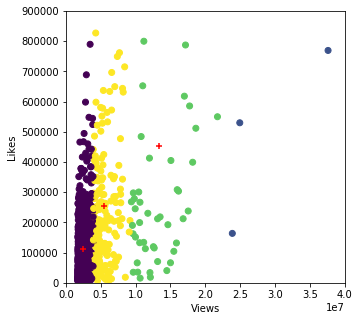

In [194]:
import statistics as stats
import random

def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

views = dfYT['views'].tolist()
likes = dfYT['likes'].tolist()
x = views
y = likes
X = np.zeros((len(views), 2))
for i in range(len(likes)):
    X[i,0] = views[i]
    X[i, 1] = likes[i]
K = 5
centroids = [[0,0], [0,0], [0,0], [0, 0], [0, 0]]
centroids[0][0] = min(views)
centroids[0][1] = likes[views.index(min(views))]
centroids[1][0] = max(views)
centroids[1][1] = likes[views.index(max(views))]
centroids[2][0] = min(likes)
centroids[2][1] = views[likes.index(min(likes))]
centroids[3][0] = max(likes)
centroids[3][1] = views[likes.index(min(likes))]
sortedViews = sorted(views)
nViews = len(views)
medianViewElement = int((nViews) /2)
medianViews = sortedViews[medianViewElement]
centroids[4][0] = medianViews
centroids[4][1] = likes[views.index(medianViews)]


def kMean(centroids, X, x, y, kVal):
    print("Initial centroids=", centroids)
    clusters = [-1]*len(x)
    dists=[0]*K
    converge = False
    while(not converge):
        
        converge = True
        for i in range(len(X)):
            dists=[dist(X[i], cent) for cent in centroids]
            assignment=dists.index(min(dists))
            clusters[i]=assignment
        
        cluster_coords = {
            "xc0":[], "xc1":[], "xc2":[], "xc3":[], "xc4":[],
            "yc0":[],"yc1":[], "yc2":[], "yc3":[], "yc4":[]
        }
    
        for i in range(len(clusters)):
            if clusters[i] == 0:
                cluster_coords["xc0"].append(x[i])
                cluster_coords["yc0"].append(y[i])
            elif clusters[i] == 1:
                cluster_coords["xc1"].append(x[i])
                cluster_coords["yc1"].append(y[i])
            elif clusters[i] == 2:
                cluster_coords["xc2"].append(x[i])
                cluster_coords["yc2"].append(y[i])
            elif clusters[i] == 3:
                cluster_coords["xc3"].append(x[i])
                cluster_coords["yc3"].append(y[i])
            elif clusters[i] == 4:
                cluster_coords["xc4"].append(x[i])
                cluster_coords["yc4"].append(y[i])

        for key in cluster_coords:
            try:
                if cluster_coords[key]:
                    new = round(sum(cluster_coords[key])/len(cluster_coords[key]))
                    splitter = [char for char in key]
                    clusterNum = int(splitter[2])
                    if splitter[0] == "x":
                        xy = 0
                    else:
                        xy=1
                    if new != centroids[clusterNum][xy]:
                        converge = False
                    centroids[clusterNum][xy] = new
            except:
                if cluster_coords[key]:
                    new = 0
                    if new != centroids[clusterNum][xy]:
                        converge = False
                    centroids[clusterNum][xy] = new
    print("Final Centroids =", centroids)
    return centroids, clusters

centrds, clsters= kMean(centroids, X, x, y, 5)

np.asarray(clsters)
np.asanyarray(centrds)

fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=clsters)
plt.scatter([x[0] for x in centrds], [x[1] for x in centrds], c='red', marker='+')
plt.axis([0, 40000000, 0, 900000])
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

How will you deal with the outliers in this problem?

## Answer:
***
Outliers in this problem were noted as different colors for my group set and ignored as they were so far off, they will not be able to accurately to influence a $\mu$ in a distribution as it would unfairly throw off the distribution to a degree that would be illogical.

#### (b) How does 'category_id' affect the results? Which category gets most views and likes?

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count
0,p9wE8dyzEJE,A Quiet Place (2018) - Official Teaser Trailer...,Paramount Pictures,1,2336528,6729,167,1286
1,rvskMHn0sqQ,A Selfish Argument for Making the World a Bett...,Kurzgesagt – In a Nutshell,27,1865071,137897,3691,15624
2,NaX-oGJEZI8,Aaj Se Teri | Padman | Akshay Kumar & Radhika ...,Zee Music Company,10,4222559,92092,3460,5512
3,dUaCEs3HfdI,Aastha Gill - Buzz feat Badshah | Priyank Shar...,Sony Music India,10,17546748,237743,27279,21034
4,7kLO2AB5SPM,about Logan Paul,CaseyNeistat,22,2768013,165858,9001,14577


#### (c) Find the optimal k for the previous problem (a) using the idea of an "elbow" or bend in the average distance-to-centroid of the data set.

#### (d) Include 'comments' as a feature and do the clustering again.  Are there certain types of category_ids that seem to lend themselves to more comments?  Explain.

#### (e) What are the shortcomings of using euclidean distance in this case? What other distance metrics can be used apart from euclidean?

#### (f) What is the correlation coefficient between 'views' and 'likes'? What do you infer from this?

***
<a/ id='p6'></a>
[Back to top](#top)
# Problem 6 (K-means vs. GMM; 20 pts)

In this consider a synthetic data set generated by simulating data coming from 3 components.

In [76]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(4022)

Cluster 1 is coming from a uniform process on $[0,1] \times [0,1]$:

In [77]:
def unifcluster(nsamp):
    d={'x': np.random.random(size=nsamp), 'y': np.random.random(size=nsamp)}
    dftemp= pd.DataFrame(data=d)
    dftemp['True_Cluster']='uniform'
    return dftemp

#Example 70 points
dfunif=unifcluster(70)
#plt.scatter(dfunif['x'],dfunif['y'], color='green')
#plt.ylim(-1, 3);
#plt.xlim(-1, 3);


Cluster 2 is coming from a multivariate normal (a Gaussian!)

In [78]:
def normcluster(nsamp):
    d=np.random.multivariate_normal([1.05,1.3], [[.5,-.1],[-.1,.2]],nsamp)
    dftemp = pd.DataFrame(data=d, columns=['x','y'])
    dftemp['True_Cluster']='normal'
    return dftemp

#Example 50 points
dfnorm=normcluster(50)
#plt.scatter(dfnorm['x'],dfnorm['y'], color='blue')
#plt.ylim(-1, 3);
#plt.xlim(-1, 3);

       
       

Cluster 3 is coming from... something angular?

In [79]:
def polarcluster(nsamp):
    beta=np.random.beta(10,10,nsamp)
    theta=[bi*np.pi-.9 for bi in beta]
    runif=np.random.random(nsamp)
    r=[.3*ri+1.55 for ri in runif]
    x=[0]*nsamp
    y=[0]*nsamp
    for i in range(nsamp):
        x[i]=r[i]*np.cos(theta[i])
        y[i]=r[i]*np.sin(theta[i])
    d={'x': x, 'y': y}
    dftemp= pd.DataFrame(data=d)
    dftemp['True_Cluster']='polar'
    return dftemp

#Example 50 points
dfpolar=polarcluster(50)
#plt.scatter(dfpolar['x'],dfpolar['y'], color='red')
#plt.ylim(-1, 3);
#plt.xlim(-1, 3);    

All together, these give us our data set:

,x,y,True_Cluster
0,0.355593,1.262988,normal
1,0.779189,0.764100,normal
2,0.572387,2.050624,normal
3,-0.524114,1.761501,normal
4,1.353092,1.563850,normal
5,1.249703,0.982300,normal
6,0.706100,0.646253,normal
7,1.307480,2.089174,normal
8,0.444544,1.391092,normal
9,1.106045,0.986996,normal


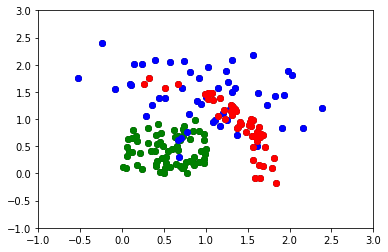

In [80]:
df=dfnorm.append(dfunif.append(dfpolar))
plt.scatter(df['x'],df['y'], color='black')

plt.scatter(dfunif['x'],dfunif['y'], color='green')
plt.scatter(dfnorm['x'],dfnorm['y'], color='blue')
plt.scatter(dfpolar['x'],dfpolar['y'], color='red')
plt.ylim(-1, 3);
plt.xlim(-1, 3);  

df.head(10)


The goal of this problem is to compare k-means and GMMs on this sort of data, and describe strenghts and weaknesses of each model in a way that we could choose between them *a priori* in the future.  The data is in `df`.

### Part 1: K-Means and Sensitivity

For both k=2 and k=3, we are going to run k-means 100 times, each with a different random initialization.

Perform the following operations 100 times:

    1) Initialize k-means by randomly selecting `k' of your data points
    2) Run k-means until convergence
    3) Save the final cluster for each point
    
    
A few rows of your final k=3 output might be:

`dfk3.head(3)'

| Point # | Run1 | Run2 | Run3 | ... | Run 100 |
| --- | --- |
| 1 | 1 | 2 | 1| ... | 1 |
| 2 | 3 | 1 | 3 | ... | 3|
| 3 | 1 | 2 | 1 | ... | 1|

(so in this example, points 1 & 3 were always in the same cluster, but point 2 was elsewhere)

In [202]:
import statistics as stats
import random

def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
K=2
x=df['x'].values
y=df['y'].values

dists=[0]*K
clusters = [-1]*len(x)

def kMean2(x, y, kVal):
    
    dfRuns = np.zeros((len(x), 100))
    
    for runNum in range(100):
        X = np.zeros((len(x), 2))
        for i in range(len(x)):
            X[i,0] = x[i]
            X[i,1] = y[i]

        [indx, indy] = random.sample(range(0, len(x)), kVal)
        centroids =[[0,0],[0,0]]
        centroids[0][0]=x[indx]
        centroids[0][1]=y[indy]
        centroids[1][0]=x[indx]
        centroids[1][1]=y[indy]
#         print("Initial centroids=", centroids)
        clusters = [-1]*len(x)
        dists=[0]*K
        converge = False
        while(not converge):

            converge = True
            for i in range(len(X)):
                dists=[dist(X[i], cent) for cent in centroids]
                assignment=dists.index(min(dists))
                clusters[i]=assignment

            cluster_coords = {
                "xc0":[], 
                "xc1":[],
                "yc0":[],
                "yc1":[]
            }

            for i in range(len(clusters)):
                if clusters[i] == 0:
                    cluster_coords["xc0"].append(x[i])
                    cluster_coords["yc0"].append(y[i])
                elif clusters[i] == 1:
                    cluster_coords["xc1"].append(x[i])
                    cluster_coords["yc1"].append(y[i])

            for key in cluster_coords:
                try:
                    if cluster_coords[key]:
                        new = sum(cluster_coords[key])/len(cluster_coords[key])
                        splitter = [char for char in key]
                        clusterNum = int(splitter[2])
                        if splitter[0] == "x":
                            xy = 0
                        else:
                            xy=1
                        if new != centroids[clusterNum][xy]:
                            converge = False
                        centroids[clusterNum][xy] = new
                except:
                    if cluster_coords[key]:
                        new = 0
                        if new != centroids[clusterNum][xy]:
                            converge = False
                        centroids[clusterNum][xy] = new
        for j in range(len(clusters)):
            dfRuns[j, runNum] = clusters[j]
            
    return dfRuns

runk2 = kMean2(x, y, K)
x=df['x'].values
y=df['y'].values
K=3

def kMean3(x, y, kVal):
    dists=[0]*K   
    dfRuns = np.zeros((len(x), 100))
    
    for runNum in range(100):
        X = np.zeros((len(x), 2))
        for i in range(len(x)):
            X[i,0] = x[i]
            X[i,1] = y[i]

        [indx1, indx2, indx3] = random.sample(range(0, len(x)), K)
        centroids =[[0,0],[0,0],[0,0]]
        centroids[0][0]=x[indx1]
        centroids[0][1]=y[indx1]
        centroids[1][0]=x[indx2]
        centroids[1][1]=y[indx2]
        centroids[2][0]=x[indx3]
        centroids[2][1]=y[indx3]
        clusters = [-1]*len(x)
        dists=[0]*K
        converge = False
        while(not converge):

            converge = True
            for i in range(len(X)):
                dists=[dist(X[i], cent) for cent in centroids]
                assignment=dists.index(min(dists))
                clusters[i]=assignment

            cluster_coords = {
                "xc0":[], 
                "xc1":[],
                "xc2":[],
                "yc0":[],
                "yc1":[],
                "yc2":[]
            }

            for i in range(len(clusters)):
                if clusters[i] == 0:
                    cluster_coords["xc0"].append(x[i])
                    cluster_coords["yc0"].append(y[i])
                elif clusters[i] == 1:
                    cluster_coords["xc1"].append(x[i])
                    cluster_coords["yc1"].append(y[i])
                elif clusters[i] == 2:
                    cluster_coords["xc2"].append(x[i])
                    cluster_coords["yc2"].append(y[i])


            for key in cluster_coords:
                try:
                    if cluster_coords[key]:
                        new = sum(cluster_coords[key])/len(cluster_coords[key])
                        splitter = [char for char in key]
                        clusterNum = int(splitter[2])
                        if splitter[0] == "x":
                            xy = 0
                        else:
                            xy=1
                        if new != centroids[clusterNum][xy]:
                            converge = False
                        centroids[clusterNum][xy] = new
                except:
                    if cluster_coords[key]:
                        new = 0
                        if new != centroids[clusterNum][xy]:
                            converge = False
                        centroids[clusterNum][xy] = new
        for j in range(len(clusters)):
            dfRuns[j, runNum] = clusters[j]
            
    return dfRuns


runk3 = kMean3(x,y,K)

In [165]:
print("For k=2:", runk2)
print("\n")
print("For k=3", runk3)

For k=2: [[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 [0. 1. 1. ... 1. 1. 0.]]


For k=3 [[1. 0. 2. ... 0. 1. 1.]
 [2. 2. 0. ... 1. 0. 0.]
 [1. 0. 2. ... 0. 1. 1.]
 ...
 [0. 1. 1. ... 2. 2. 2.]
 [0. 1. 1. ... 2. 2. 2.]
 [1. 0. 2. ... 0. 1. 1.]]


0 1 and 2 will behave the same as the exampled 1, 2, and 3.

### Part 2: GMM as a hard cluster

Run the EM algorithm for a Gaussian mixture model on the data with k=2 and k=3 components.  Initialize using the min/max of the first data dimension for k=2, then also initialize with the point the greatest minimum distance from these two points for k=3.

When your model has run instead of reporting the estimated $\gamma$ or $p$ probabilities, *hard* cluster each point $x_i$ according to the maximum estimated $\gamma$ value for that point so the GMM and k-means models can be compared side by side.

In [215]:
#k=2 initialize
from scipy.stats import multivariate_normal as shit

x=df['x'].values
y=df['y'].values
K=2

mu1, mu2 = min(x), max(x)
covariance = np.cov(x,y)[0][1]
pi = 0.50
p_class1 = 1-pi
p_class2 = pi

for _ in range(50): #100 steps is fine; or a tolerance check.
    # Expectation step:
#     np.random.multivariate_normal([0,0], [[1,.1],[.1,1]],10)  #sample of size j=10 rho=.1  N(0,1)

    p_data_given_class1 = shit.pdf(x, mean=mu1, cov=covariance)
    p_data_given_class2 = shit.pdf(x, mean=mu2, cov=covariance)

    p_class1_given_data = p_data_given_class1*p_class1
    p_class2_given_data = p_data_given_class2*p_class2

    summ = p_class1_given_data + p_class2_given_data
    p_class1_given_data = p_class1_given_data / summ
    p_class2_given_data = p_class2_given_data / summ

    # Maximization step:
    n_class1 = np.sum(p_class1_given_data)
    n_class2 = np.sum(p_class2_given_data)

    pi = n_class2/len(x)
    p_class1 = 1-pi
    p_class2 = pi

    mu1 = (1/n_class1)*np.sum(p_class1_given_data*x)
    mu2 = (1/n_class2)*np.sum(p_class2_given_data*x)

#     var1 = (1/n_class1)*np.sum(p_class1_given_data*((x-mu1)**2))
#     var2 = (1/n_class2)*np.sum(p_class2_given_data*((x-mu2)**2))

print(mu1, mu2)
# print(var1, var2)
print(pi, n_class1)

k2GMM = []
for i in range(len(x)):
    pdgc1= shit.pdf(x[i], mean=mu1, cov=covariance)
    pdgc2 = shit.pdf(x[i], mean=mu2, cov=covariance)
    pc1gd = pdgc1*p_class1
    pc2gd = pdgc2*p_class2
    sumM = pc1gd+pc2gd
    pc1gd = pc1gd/sumM
    pc2gd = pc2gd/sumM
    if pc1gd > pc2gd:
        k2GMM.append(0)
    else:
        k2GMM.append(1)

print(k2GMM)

0.5195497008282142 1.4577039711136177
0.42792662328947145 97.25247404078986
[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [219]:
#k=3 initialize
from scipy.stats import multivariate_normal as shit
K=3

tmp4median = np.array(x)
tmp4median = sorted(tmp4median)
tmp4medianVal = tmp4median[round((len(x)+1)/2)]
mu1, mu2, mu3= min(x), max(x), tmp4medianVal
covariance = np.cov(x,y)[0][1]

pi = 0.3333
p_class1 = pi
p_class2 = pi
p_class3 = pi

for _ in range(50): #100 steps is fine; or a tolerance check.
    # Expectation step:
    # np.random.multivariate_normal([0,0], [[1,.1],[.1,1]],10)  #sample of size j=10 rho=.1  N(0,1)

    pdgc1 = shit.pdf(x, mean=mu1, cov=covariance)
    pdgc2 = shit.pdf(x, mean=mu2, cov=covariance)
    pdgc3 = shit.pdf(x, mean=mu3, cov=covariance)
    
    pc1gd = pdgc1*p_class1
    pc2gd = pdgc2*p_class2
    pc3gd = pdgc3*p_class2

    summ = pc1gd + pc2gd + pc3gd
    pc1gd = pc1gd / summ
    pc2gd = pc2gd / summ
    pc3gd = pc3gd / summ

    # Maximization step:
    n_class1 = np.sum(pc1gd)
    n_class2 = np.sum(pc2gd)
    n_class3 = np.sum(pc3gd)

    p_class1 = n_class3/len(x)
    p_class2 = n_class2/len(x)
    p_class3 = n_class1/len(x)

    mu1 = (1/n_class1)*np.sum(pc1gd*x)
    mu2 = (1/n_class2)*np.sum(pc2gd*x)
    mu3 = (1/n_class3)*np.sum(pc3gd*x)

#     var1 = (1/n_class1)*np.sum(p_class1_given_data*((x-mu1)**2))
#     var2 = (1/n_class2)*np.sum(p_class2_given_data*((x-mu2)**2))

k3GMM = []
for i in range(len(x)):
    pdgc1= shit.pdf(x[i], mean=mu1, cov=covariance)
    pdgc2 = shit.pdf(x[i], mean=mu2, cov=covariance)
    pdgc3 = shit.pdf(x[i], mean=mu3, cov=covariance)
    pc1gd = pdgc1*p_class1
    pc2gd = pdgc2*p_class2
    pc3gd = pdgc3*p_class3
    sumM = pc1gd+pc2gd+pc3gd
    pc1gd = pc1gd/sumM
    pc2gd = pc2gd/sumM
    pc3gd = pc3gd/sumM
    if (pc1gd > pc2gd) and (pc1gd > pc3gd):
        k3GMM.append(0)
    elif (pc2gd > pc1gd) and (pc2gd > pc3gd):
        k3GMM.append(1)
    elif (pc3gd > pc1gd) and (pc3gd > pc2gd):
        k3GMM.append(2)

In [220]:
print(k2GMM)

[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [221]:
print(k3GMM)

[0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]


### Part 3: Scoring models with a Rand statistic
We need to do two things: pick a "best" model between the multiple calibrations of k-means, and then eventually compare between the models with different numbers of components.

To do this we are going to use the Rand statistic, with documentation here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html


A) For the 100 runs of `k=2` k-means, compute a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).  Add that run to a data frame holding the final hard clusters of the two GMM models.

B) Repeat part 3A) for `k=3` k-means.  You should now have a matrix with 4 rows (one per model) and 170 columns.  Plot in 4 panes each of these clustering results, with different colors for each cluster.

C) Add the original data's clusters to this data frame.

D) Compute and print the Rand Statistic for each of the 4 models, comparing to the true data.

In [226]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score([1, 0, 1], [0,1,0])) #example that's actually the same assignments!
print(adjusted_rand_score([1, 0, 1], [0,0,1])) #example: Rand score is negative if very different

1.0
-0.49999999999999994


In [236]:

trueClusterVals = []
holder=df['True_Cluster'].values
for i in range(len(holder)):
    if holder[i] == 'uniform':
        trueClusterVals.append(0)
    if holder[i] == 'normal':
        trueClusterVals.append(1)
    if holder[i] == 'polar':
        trueClusterVals.append(2)
full = np.zeros((5,len(x)))

kmean2 = []
for i in range(100):
    kmean2.append(sklearn.metrics.adjusted_rand_score(trueClusterVals, runk2[:,i]))
highest = max(kmean2)
kmean2indx=[i for i, ii in enumerate(kmean2) if ii == highest]
full[0, :] = runk2[:, max(kmean2indx)]

kmean3 = []
for i in range(100):
    kmean3.append(sklearn.metrics.adjusted_rand_score(trueClusterVals, runk3[:,i]))
highest = max(kmean3)
kmean3indx=[i for i, ii in enumerate(kmean3) if ii == highest]
full[1, :] = runk3[:, max(kmean3indx)]

#######################################

full[2, :] = k2GMM
full[3, :] = k3GMM

######################################

full[4, :] = trueClusterVals

######################################

finalTest = []
for i in range(5):
    finalTest.append(sklearn.metrics.adjusted_rand_score(full[i,:], full[:,4]))
finalTest

ValueError: labels_true and labels_pred must have same size, got 170 and 5

### Part 4: Discussion

A) Between the 4 models: k-means with k=2 or k=3, and 2 or 3 component Gaussian Mixture models, describe in words why you think the best performing model performed best.

B) Describe in words why you think the worst performing model performed the worst.  Is it a function of the model or using a Rand statistic to score?

For both A) and B) try to make specific comments about the *shape* of the data: which algorithms should work best on angular, uniform, and normal clusters?

# Answer
***
Unfortunately, between the size of this assignment and my 19 credit hours I was not able to resolve the error above in part 3. Which sucks because it kind of means all the work I did before was all for not. But based on conceptual understandings I would claim that the worst performing model would have been the Gaussian mixing model for any of the sizes of k. I would claim this as the Gaussian mixing model relies on pdf valuations and comparitively "hand-wavy" probabilities of classifying a data point for an event in relation to k-means clustering. K-means should perform far better as it builds its clusters and updates the centroids of these clusters with intent that multiple events are acting on the data-set and it must adequately update the classification of data points and the "method" of classifying them in relation to the distance to the updated centroids of the cluster. Further more with a larger k-value the k-means algorithm would be able to better categorize the larger spread of data and event behaviors as this allows for a higher number of centroids to thus better handle outliers. On the subject of outliers, Gaussian models often struggle with these as they can easily sway the distributions $\mu$ values and thus easily influence the categorization of randome variable's proabilities of falling within a event's categorization.